# Neural Network Implementation for Hand Written Digit classification

**Author - Chinmay Vadgama; ID : 014551407**

Instructions :
```
1. Implement Mini-Batch Gradient Descent
2. Implement drop-out regularization for all/some of the layers to see the impact of drop out technique
3. Initialize Random Weights 
4. Use Image Augmentation to achieve robustness and avoid overfitting
5. Try using multiple layers(more than 2) and experiment with number of layers and neurons
6. Use appropriate activation function such as RelU and Softmax
7. Scale/Normalize the input
8. Use different Learning rates/adaptive learning rate
9. The code should provide appropriate metrics, visualization,  testing and training accuracy etc.,. and plot the results and confusion matrix  (this is important)
10. Display top common errors in NN learning
```







In [0]:
import numpy as np
import sys
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tqdm import tqdm

# Load MNIST Data

In [0]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [3]:
X_train.shape

(60000, 28, 28, 1)

In [4]:
y_train.shape

(60000,)

# Data Augmentation

In [0]:
datagen = ImageDataGenerator(
    rotation_range=20
    )

In [0]:
datagen.fit(X_train)

In [0]:
augmented_data = datagen.flow(X_train, y_train, batch_size=128)

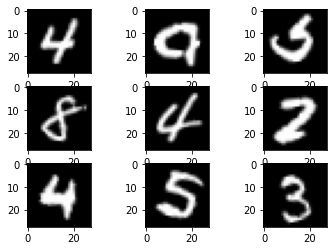

In [8]:
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
	# show the plot
	plt.show()

	break

In [34]:
'''
augmented_data = []
num_augmented = 0
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=128, shuffle=False):
    augmented_data.append(X_batch)
    num_augmented += 128
    if num_augmented == X_train.shape[0]:
        break
#augmented_data = np.concatenate(augmented_data)
'''

'\naugmented_data = []\nnum_augmented = 0\nfor X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=128, shuffle=False):\n    augmented_data.append(X_batch)\n    num_augmented += 128\n    if num_augmented == X_train.shape[0]:\n        break\n#augmented_data = np.concatenate(augmented_data)\n'

In [0]:
images, labels = (X_train[0:1000].reshape(1000,28*28)/255 , y_train[0:1000])
one_hot_labels = np.zeros((len(labels),10))

In [0]:
for i,l in enumerate(labels):
  one_hot_labels[i][l] = 1
labels = one_hot_labels

In [0]:
test_images = X_test.reshape(len(X_test),28*28)/255
test_labels = np.zeros((len(y_test),10))

# Activation Functions

In [0]:
for i,l in enumerate(y_test):
  test_labels[i][l] = 1

In [0]:
def tanh(x):
  return np.tanh(x)

In [0]:
def tanhderiv(x):
  return 1-(x**2)

In [0]:
def softmax(x):
  temp = np.exp(x)
  return temp/np.sum(temp,axis=1,keepdims=True)

In [0]:
def relu(x):
  '''
    if input is greater or equal than 0 it will return input and if input is less than 0 it will return 0
  '''
  return (x>=0) * x

# NN architecture

In [0]:
learning_rate_alpha, iterations, hidden_layer_1, hidden_layer_2 = (2, 200, 350, 74)

In [0]:
pixels, num_labels = (784,10)

In [0]:
batch_size = 100

**Ramdomize Weights**

In [0]:
weights_01 = 0.002*np.random.random((pixels,hidden_layer_1))-0.001
weights_12 = 0.02*np.random.random((hidden_layer_1,hidden_layer_2))-0.01
weights_23 = 0.2*np.random.random((hidden_layer_2,num_labels))-0.1

In [57]:
for j in tqdm(range(iterations)):
  correct_cnt = 0
  for i in range(int(len(images)/batch_size)):
    batch_start, batch_end = ((i*batch_size),(i+1*batch_size))
    layer_0 = images[batch_start:batch_end]
    layer_1 = tanh(np.dot(layer_0,weights_01))
    layer_2 = tanh(np.dot(layer_1,weights_12))
    layer_3 = softmax(np.dot(layer_2,weights_23))
    #print(layer_3)
    #print(labels)
    for k in range(batch_size):
      try:
        correct_cnt += int(np.argmax(layer_3[k:k+1])==np.argmax(labels[batch_start+k:batch_start+k+1]))
      except:
        break
    layer3del = (labels[batch_start:batch_end]-layer_3)/(batch_size*layer_3.shape[0])
    layer2del = layer3del.dot(weights_23.T)*tanhderiv(layer_2)
    layer1del = layer2del.dot(weights_12.T)*tanhderiv(layer_1)
    weights_23 += learning_rate_alpha * layer_2.T.dot(layer3del)
    weights_12 += learning_rate_alpha * layer_1.T.dot(layer2del)
    weights_01 += learning_rate_alpha * layer_0.T.dot(layer1del)
  test_correct_count = 0
  for i in range(len(test_images)):
    layer_0 = test_images[i:i+1]
    layer_1 = tanh(np.dot(layer_0,weights_01))
    layer_2 = tanh(np.dot(layer_1,weights_12))
    layer_3 = np.dot(layer_2,weights_23)
    test_correct_count += int(np.argmax(layer_3)==np.argmax(test_labels[i:i+1]))

  5%|▌         | 10/200 [00:14<04:44,  1.50s/it]

KeyboardInterrupt: ignored